# Part I - Prosper Loan Data Exploration
## by Natalie Nguyen

## Introduction

The primary objective of this project is to conduct a comprehensive data exploration of the Prosper Loan dataset. The dataset comprises 113,937 loans with 81 variables for each loan, including borrower income, loan amount, borrower rate (interest rate), current loan status, and several other variables. With such vast information available, this exploration aims to identify the key variables that impact borrowers' decision-making process while selecting a loan and to uncover any interesting patterns or relationships between the variables in the dataset.

Prosper Loan is a peer-to-peer lending company that connects borrowers with investors. It was founded in 2005 and is headquartered in San Francisco, California. As a pioneer in the peer-to-peer lending industry, Prosper Loan provides a platform that enables individuals and small businesses to obtain loans directly from investors without the involvement of traditional financial institutions. The company has facilitated over $12 billion in loans since its inception and has helped over 960,000 borrowers get access to affordable credit. This project aims to analyze Prosper Loan's dataset to gain insights into the lending industry and to identify factors that impact borrower decision-making.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Set the max_columns display option to show all columns
pd.set_option('display.max_columns', None)

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# quick check the data
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# high-level overview of data shape and composition
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

The dataset consists of 113,937 entries and 81 columns. Every row corresponds to a loan, and every column details facts related to that loan. The dataset contains a combination of categorical and numerical variables: 61 numerical ones, 17 categorical, and 3 boolean.

### What is/are the main feature(s) of interest in your dataset?

**The aim of this project is to explore the motivations of borrowers when applying for loans, and to identify the factors that impact their decision-making process when selecting a loan.**

With a deeper understanding of these factors, companies can potentially identify areas for improvement in the lending industry and develop targeted strategies to better meet the needs of borrowers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To investigate borrower motivations when applying for loans and the factors influencing their decision to choose a loan, I choose to focus on features that relate to loan terms, borrower financial profile, and loan purpose. 

Here are 10 features from the dataset that can support this investigation:
* **"Term"**: The length of the loan might impact the borrower's decision due to their repayment preferences.
* **"BorrowerAPR"**: The annual percentage rate (APR) can be a critical factor as it represents the total cost of borrowing, including fees and other charges.
* **"BorrowerRate"**: The interest rate on the loan is a significant factor, as it determines the cost of borrowing for the borrower.
* **"LoanOriginalAmount"**: The loan amount requested by the borrower.
* **"MonthlyLoanPayment"**: The scheduled monthly payment for the loan, which impacts the borrower's budget and ability to repay.
* **"DebtToIncomeRatio"**: The borrower's debt-to-income ratio, which can indicate their ability to manage monthly payments and repay the loan.
* **"IncomeRange"**: The income range of the borrower, which can impact their ability to afford the loan and their perceived risk.
* **"EmploymentStatus"**: The employment status of the borrower, which can influence the borrower's stability and ability to repay the loan.
* **"ListingCategory"**: The purpose of the loan, as borrowers may have different preferences or motivations for various loan purposes.
* **"CreditScoreRangeLower"** and **"CreditScoreRangeUpper"**: The credit score range of the borrower, which can affect the loan terms they qualify for. 

#### Variables Defintion

Before going to the exploration, let's look into each variable meaning and create a new dataframe includes only the features we will explore.

* **"Term"**: The length of the loan expressed in months.
* **"BorrowerAPR"**: The Borrower's Annual Percentage Rate (APR) for the loan.
* **"BorrowerRate"**: The Borrower's interest rate for this loan. 
* **"LoanOriginalAmount"**: The origination amount of the loan.
* **"MonthlyLoanPayment"**: The scheduled monthly loan payment.
* **"DebtToIncomeRatio"**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
* **"IncomeRange"**: The income range of the borrower at the time the listing was created.
* **"EmploymentStatus"**: The employment status of the borrower at the time they posted the listing.
* **"ListingCategory"**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
* **"CreditScoreRangeLower"**: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
* **"CreditScoreRangeUpper"**: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

To ensure data integrity, we will check for duplicate values in the columns ListingKey, ListingNumber, and ListingCreateDate before creating a new dataframe. These columns contain unique data that were assigned to each loan, and therefore should not have any duplicates.

In [6]:
# Show duplicated rows based on ListingKey, ListingNumber, and ListingCreateDate
duplicated_data = ['ListingKey', 'ListingNumber', 'ListingCreationDate']

duplicated_rows = df[df.duplicated(subset= duplicated_data, keep=False)]
duplicated_num = sum(df[duplicated_data].duplicated())

print(f"There are {duplicated_num} duplicate records in the dataset:")
print('\n')
duplicated_rows

There are 871 duplicate records in the dataset:




,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,0.10900,0.0399,0.06910,6.0,A,6.0,1,LA,Other,Employed,16.0,True,False,NaN,2013-12-17 09:18:36,740.0,759.0,1973-12-01 00:00:00,24.0,21.0,50.0,13,533.0,2.0,12.0,0.0,0.0,0.0,1.0,0.0,17451.0,0.34,24401.0,47.0,0.97,2.0,0.32,"$100,000+",True,10416.666667,A8B83704317372651543A02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,127405,35000,2014-01-16 00:00:00,Q1 2014,BD9D3700316006874885EE9,1169.03,1157.1492,800.72,356.4292,-29.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
176,106335993636414276CB477,1119836,2014-01-08 14:27:50.320000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,0.25006,0.1475,0.10256,2.0,E,3.0,3,WA,Sales - Commission,Employed,108.0,False,False,NaN,2014-01-08 14:27:52,640.0,659.0,1998-10-09 00:00:00,3.0,3.0,24.0,3,162.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7177.0,0.63,4123.0,22.0,0.73,1.0,0.06,"$75,000-99,999",True,6250.000000,BBE63704110073042883EB9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126992,4000,2014-01-16 00:00:00,Q1 2014,A11F3694615686626190A12,166.54,166.5400,69.72,96.8200,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
313,09233589620788733CFB8CE,930842,2013-09-25 08:03:11.860000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,0.13705,0.0549,0.08215,5.0,B,3.0,1,KY,Professiona

Duplicates in the data may be the result of errors in the system or during data entry, resulting in repeated data for a loan. Therefore, it is necessary to remove these duplicate entries.

In [7]:
df = df.drop_duplicates(subset=duplicated_data, keep='first')
sum(df[duplicated_data].duplicated())

0

Create CreditScoreMean column

In [8]:
# Drop Null value from CreditScoreRangeLower and CreditScoreRangeUpper
credit_score = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
df = df.dropna(subset=credit_score)

# Create a new column for the credit score mean 
df['CreditScoreMean'] = df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

Next, let's create new column with matching loan purpose to listing category.

In [9]:
# Create category titles
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map to existing column
df['ListingCategory'] = df['ListingCategory (numeric)'].map(category_titles)

df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScoreMean,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,649.5,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,689.5,Home Improvement
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,489.5,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,809.5,Motorcycle
4,0F023589499656230C5E3E2,909

Next, let's update the new dataframe with only the features we are going to explore.

In [10]:
df2 = df[['Term', 'BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 'MonthlyLoanPayment',
          'DebtToIncomeRatio', 'IncomeRange', 'EmploymentStatus', 'ListingCategory',
          'CreditScoreMean']]
print(df2.shape)
df2.head()

(112475, 10)


,Term,BorrowerAPR,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio,IncomeRange,EmploymentStatus,ListingCategory,CreditScoreMean
0,36,0.16516,0.1580,9425,330.43,0.17,"$25,000-49,999",Self-employed,Not Available,649.5
1,36,0.12016,0.0920,10000,318.93,0.18,"$50,000-74,999",Employed,Home Improvement,689.5
2,36,0.28269,0.2750,3001,123.32,0.06,Not displayed,Not available,Not Available,489.5
3,36,0.12528,0.0974,10000,321.45,0.15,"$25,000-49,999",Employed,Motorcycle,809.5
4,36,0.24614,0.2085,15000,563.97,0.26,"$100,000+",Employed,Home Improvement,689.5


The updated dataset has 113066 rows and 11 columns. Let's quickly review all columns and create an overview of data

Map "not employed" with 0 in IncomeRange

In [11]:
df2.IncomeRange = df2.IncomeRange.str.replace('Not employed', '$0')

# Verify changes
df2.IncomeRange.value_counts()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_20228\1265562586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.IncomeRange = df2.IncomeRange.str.replace('Not employed', '$0')


$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
$1-24,999          7241
Not displayed      7150
$0                 1427
Name: IncomeRange, dtype: int64

Convert IncomeRange to ordered list

In [12]:
order_income = {'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                '$75,000-99,999', '$100,000+', 'Not displayed']}

for key, value in order_income.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df2[key] = df2[key].astype(correct_order)

# Verify changes
df2[order_income.keys()].dtypes


C:\Users\Natalie\AppData\Local\Temp\ipykernel_20228\1701270444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[key] = df2[key].astype(correct_order)


IncomeRange    category
dtype: object

In [13]:
# review all columns data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112475 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Term                112475 non-null  int64   
 1   BorrowerAPR         112475 non-null  float64 
 2   BorrowerRate        112475 non-null  float64 
 3   LoanOriginalAmount  112475 non-null  int64   
 4   MonthlyLoanPayment  112475 non-null  float64 
 5   DebtToIncomeRatio   104009 non-null  float64 
 6   IncomeRange         112475 non-null  category
 7   EmploymentStatus    110809 non-null  object  
 8   ListingCategory     112475 non-null  object  
 9   CreditScoreMean     112475 non-null  float64 
dtypes: category(1), float64(5), int64(2), object(2)
memory usage: 8.7+ MB


We can see that variables DebtToIncomeRatio, EmploymentStatus have null values. Let's run the descriptive statistics to get more information on this.

In [14]:
# an overview of descriptive statistics
df2.describe()

,Term,BorrowerAPR,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio,CreditScoreMean
count,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,104009.000000,112475.000000
mean,40.825392,0.219182,0.193081,8331.963788,272.457087,0.276759,695.024961
std,10.443036,0.080403,0.074830,6241.227735,192.628124,0.554862,66.635895
min,12.000000,0.006530,0.000000,1000.000000,0.000000,0.000000,9.500000
25%,36.000000,0.156290,0.134600,4000.000000,131.690000,0.140000,669.500000
50%,36.000000,0.210250,0.184000,6500.000000,217.740000,0.220000,689.500000
75%,36.000000,0.284470,0.250600,12000.000000,371.435000,0.320000,729.500000
max,60.000000,0.423950,0.360000,35000.000000,2251.510000,10.010000,889.500000


Something to note here:
* BorrowerRate has minimum value at 0
* MonthlyLoanPayment has minimum value at 0
* DebtToIncomeRatio has minimum value at 0
* CreditScoreRangeLower has minimum value at 0

Before we have seen that there are null values in DebtToIncomeRatio. We can now drop these null values because the variables already have value 0 for borrower who might not having any debt. 

For EmploymentStatus null value, we will cross-check it with IncomeRange, if they have IncomeRange than we can replace null value as Not displayed, otherwise we will remove it.

In [15]:
# Drop null value in DebtToIncomeRatio
df2 = df2.dropna(subset=['DebtToIncomeRatio'])

# verify changes
df2.DebtToIncomeRatio.isnull().sum()

0

In [16]:
# check value in EmploymentStatus
df2.EmploymentStatus.value_counts()

Employed         65172
Full-time        25590
Not available     5250
Other             3462
Self-employed     1092
Part-time          969
Retired            735
Not employed        96
Name: EmploymentStatus, dtype: int64

In [17]:
# Replace null values with "Not available" if IncomeRange is not null
df2.loc[df2['IncomeRange'].notnull(), 'EmploymentStatus'] = df2.loc[df2['IncomeRange'].notnull(), 'EmploymentStatus'].fillna('Not available')

# Remove rows where IncomeRange is 0 or "Not displayed" and EmploymentStatus is null
df2 = df2[~((df2['IncomeRange'] == '$0') | (df2['IncomeRange'] == 'Not displayed')) & df2['EmploymentStatus'].notnull()]

# Verify changes
df2.EmploymentStatus.isnull().sum()

0

We're all set. Let's start the investigation.

## Univariate Exploration

### Feature: "Term"
#### What is the distribution of loan terms, and which loan term is the most common?

In [18]:
# Let's first investigate the 'Term'
df2.Term.describe()

count    96899.000000
mean        41.308785
std         10.772711
min         12.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: Term, dtype: float64

In [19]:
# Calculate proportion for each Loan Term 

# Calculate the value counts of Term column
term_counts = df2.Term.value_counts()

# Calculate the proportion of each loan term
term_prop = term_counts / len(df2)

# Print the proportion of each loan term
print(term_prop)

36    0.749595
60    0.235802
12    0.014603
Name: Term, dtype: float64


In [20]:
sb.set_theme(style='darkgrid')

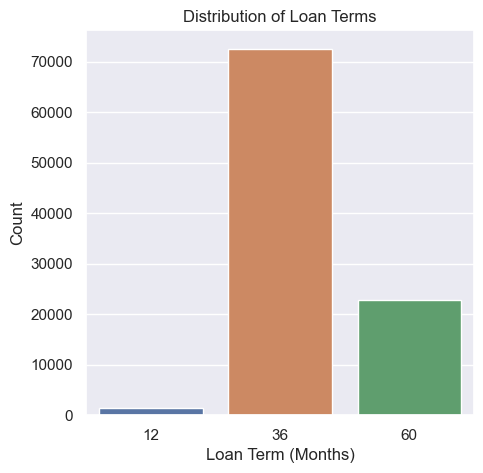

In [21]:
# Create function to customize plot
def customise_chart(xlabel, ylabel, title, w, h):
    fig = plt.gcf()
    fig.set_size_inches(w,h)  
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
# Create bar plot for loan term
sb.countplot(data=df2, x='Term')
customise_chart('Loan Term (Months)', 'Count', 'Distribution of Loan Terms', 5, 5)

> From this analysis, we can conclude that the most common loan term is 36 months, with 74.9% of loans having this term. The distribution is skewed towards shorter loan terms, with 60-month terms accounting for 23.5% and 12-month terms making up only 1.46% of the loans.

### Feature: BorrowerRate and BorrowerAPR

#### What is the distribution of borrower APRs and interest rates, and are there any visible patterns or outliers?

First, we will define 2 functions: 
* 'find_bins' : to calculate the optimal number of bins for a given dataset using the Freedman-Diaconis rule.
* 'find_outliers_iqr': to calculate outliers (if any) using IQR method.

In [22]:
# Define a function'find_bins' to calculate the optimal number of bins
def find_bins(data):
    # Calculate the IQR
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    min_value = data.min()
    max_value = data.max()
    
    # Calculate the number of data points
    n = len(data.dropna())
    
    # Calculate the bin width using Freedman-Diasconis rule
    bin_width = 2 * iqr / (n ** (1/3))
    
    # Calculate the number of bins
    number_of_bins = int(np.ceil((max_value - min_value) / bin_width))
    
    return number_of_bins

In [23]:
# Define a function 'find_outliers_iqr' to calculate outliers:
def find_outliers_iqr(data):
    # Calculate the IQR
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    min_value = data.min()
    max_value = data.max()
    
    # Calculcate the outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outliers_rows = data[(data < lower_bound) | (data > upper_bound)].index
    
    return outliers, outliers_rows

After creating function to find bins and find outliers, we can use it to find the bins and outliers or BorrowerAPR and BorrowerRate. We will also display the descriptive statistics and create histograms for these features.

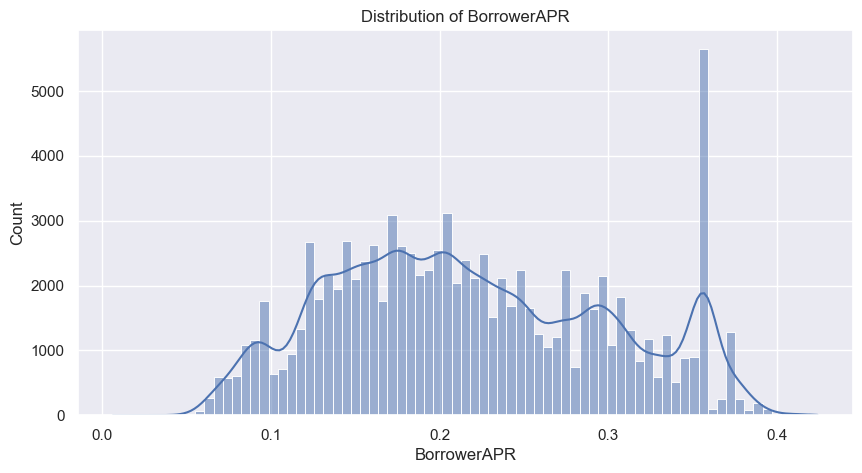

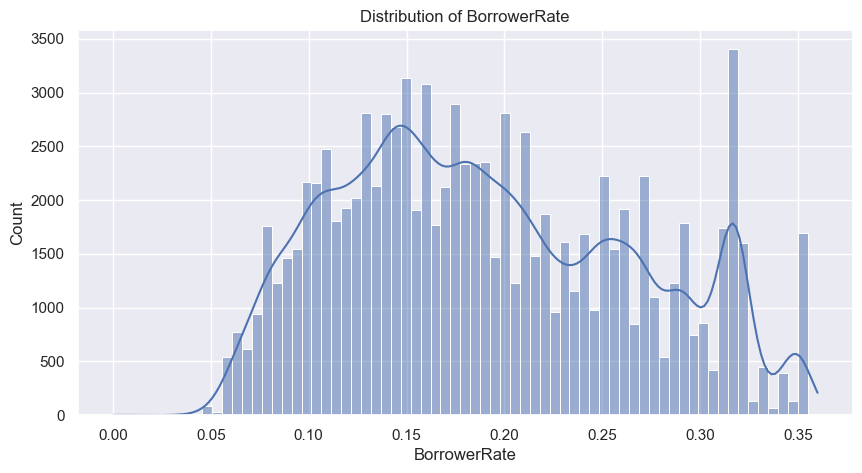

In [24]:
# Find number of bins for BorrowerAPR, BorrowerRate and create histogram

# Define the features to analyze
features = ['BorrowerAPR', 'BorrowerRate']

# Loop through each feature
for feature in features:
    # Find the optimal number of bins for the current feature
    number_of_bins = find_bins(df2[feature])

    # Create the histogram
    plt.figure(figsize=(10, 5))
    sb.histplot(data=df2, x=feature, kde=True, bins=number_of_bins)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

> Both BorrowerAPR and BorrowerRate exhibit a right-skewed distribution, with the majority of data clustered on the lower end of the scale. Nonetheless, a prominent peak is evident in both APR and Interest Rate at the range of 0.33-0.37. Additionally, there is a broad range of values for both APR and Interest Rate, ranging from approximately 0 to more than 0.4.

We can run some calculation to understand the graph more thoroughly.

In [25]:
# Calculate the most common APR and Interest Rate

for feature in features:
    # Calculate the most common value
    mode = df2[feature].mode()[0]
    
    # Calculate the proportion of each value
    proportion = df2[feature].value_counts(normalize=True)
    
    # Show only the top 5 proportion
    top_proportion = proportion.sort_values(ascending=False).head(5)
    
    print(f"The most common {feature}:")
    print(mode)
    print(f"The proportion of {feature}:")
    print(top_proportion)
    print("\n")

The most common BorrowerAPR:
0.35797
The proportion of BorrowerAPR:
0.35797    0.030857
0.35643    0.013705
0.37453    0.011662
0.30532    0.008070
0.29510    0.006677
Name: BorrowerAPR, dtype: float64


The most common BorrowerRate:
0.3177
The proportion of BorrowerRate:
0.3177    0.030857
0.3500    0.017214
0.3199    0.013777
0.2699    0.012054
0.1400    0.009133
Name: BorrowerRate, dtype: float64




> Based on the information provided, we can see that the most common BorrowerAPR is 0.35797 and the most common BorrowerRate is 0.3177 - which is quite high compared to the rate in industry.

> We can also see that the top 5 proportions for both features represent a relatively small percentage of all loans, indicating that there is a wide range of APR and interest rates among borrowers.

In [26]:
# Run descriptive statistics and find outliers 

# Loop through each feature
for feature in features:
    # Find the outliers and their row indices for the current feature
    outliers, outliers_rows = find_outliers_iqr(df2[feature])

    # Print desciptive statistics
    print(f"Descriptive statistics for {feature}:")
    print(df2[feature].describe())
    print("\n")
    
    # Print outliers numbers and outliers rows
    print(f"Outliers for {feature}:")
    print(outliers)
    print("\n")
    print("Row indices of outliers:")
    print(outliers_rows)
    print("\n")


Descriptive statistics for BorrowerAPR:
count    96899.000000
mean         0.217798
std          0.080195
min          0.006530
25%          0.155380
50%          0.207850
75%          0.280340
max          0.423950
Name: BorrowerAPR, dtype: float64


Outliers for BorrowerAPR:
Series([], Name: BorrowerAPR, dtype: float64)


Row indices of outliers:
Int64Index([], dtype='int64')


Descriptive statistics for BorrowerRate:
count    96899.000000
mean         0.190900
std          0.074572
min          0.000000
25%          0.131400
50%          0.180000
75%          0.249200
max          0.360000
Name: BorrowerRate, dtype: float64


Outliers for BorrowerRate:
Series([], Name: BorrowerRate, dtype: float64)


Row indices of outliers:
Int64Index([], dtype='int64')




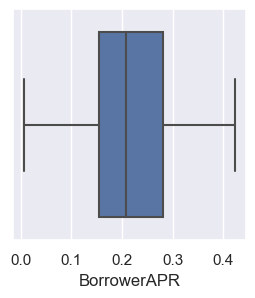

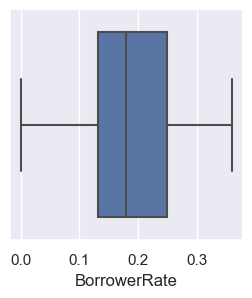

In [27]:
for feature in features:
    plt.figure(figsize=(3, 3))
    sb.boxplot(data=df2, x=feature)
    plt.show()

> **Summary:**
It is observed that both BorrowerAPR and BorrowerRate have a right-skewed distribution with most of the data concentrated on the lower end of the scale. The mean and median APRs are higher than the mean and median interest rates, indicating that borrowers are paying more in interest than just the stated interest rate. Furthermore, the standard deviation of APR is higher than the standard deviation of interest rate, indicating that the APR values are more spread out from the mean. There are no outliers has been found, this could be because after removing nulls value and tidy data.

### LoanOriginalAmount

#### What is the range and distribution of loan amounts? Are there any outliers in the loan amount distribution?

Next we will investigate the Loan Original Amount that borrowers request when they apply for the loan.

In [28]:
df2.LoanOriginalAmount.describe()

count    96899.000000
mean      8680.516909
std       6350.270902
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

> Based on the descriptive statistics, we can see that the LoanOriginalAmount has a wide range of values, from 1000 to 35000. The mean loan amount is 8680.51, with a standard deviation of 6350.27, indicating that the loan amounts are somewhat spread out from the mean. The 25th percentile is 4000, and the 75th percentile is 12500, indicating that most of the loans fall in this range.

In [29]:
loan_amounts = df2['LoanOriginalAmount']

# Calculate the range of loan amounts
loan_range = loan_amounts.max() - loan_amounts.min()

# Calculate the most common loan amount
most_common_amount = loan_amounts.mode()[0]

# Calculate the proportion of loan amount, showing only top 5
proportion = loan_amounts.value_counts(normalize=True).sort_values(ascending=False)

print("The range of loan amounts is:", loan_range)
print("The most common loan amount is:", most_common_amount)
print("Top 5 loan amounts:")
print(proportion.head(5))

The range of loan amounts is: 34000
The most common loan amount is: 4000
Top 5 loan amounts:
4000     0.125512
15000    0.113066
10000    0.099000
5000     0.060558
2000     0.052839
Name: LoanOriginalAmount, dtype: float64


> The most common loan amount is 4000, and the top 5 loan amounts are 4000, 15000, 10000, 5000, and 2000. This indicates that a significant number of borrowers tend to borrow smaller loan amounts, while a few borrowers are taking out larger loans.

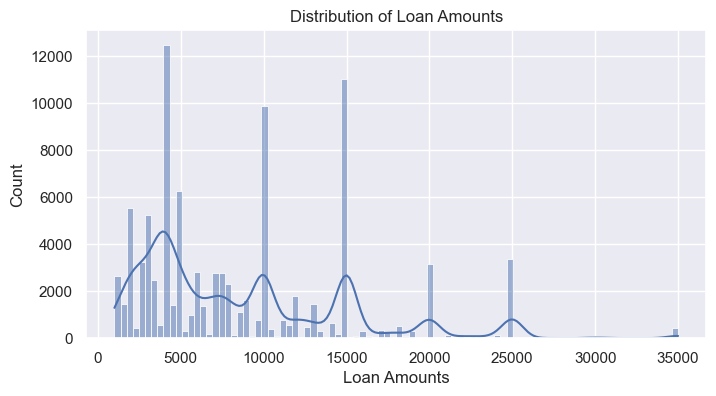

In [30]:
# Calculate bins for histogram
number_of_bins = find_bins(loan_amounts)


# Plot the distribution of loan amounts
plt.figure(figsize=(10, 5))
sb.histplot(data=loan_amounts, kde=True, bins=number_of_bins)
customise_chart('Loan Amounts', 'Count', 'Distribution of Loan Amounts',8,4)

> Overall, the LoanOriginalAmount seems to have a fairly normal distribution.

Let's investigate any outliers that may exist in the loan amount distribution, as they may indicate potential issues such as overborrowing or underwriting.

In [31]:
outliers, outliers_rows = find_outliers_iqr(loan_amounts)

print("Outliers for Loan Amounts:")
print(outliers)
print("\n")
print("Row indices of outliers:")
print(outliers_rows)

Outliers for Loan Amounts:
29        35000
224       30000
234       30000
633       30000
637       35000
          ...  
112588    35000
112684    31750
113023    28000
113167    35000
113752    35000
Name: LoanOriginalAmount, Length: 664, dtype: int64


Row indices of outliers:
Int64Index([    29,    224,    234,    633,    637,    649,    687,    786,
              1029,   1223,
            ...
            111648, 111703, 111939, 112048, 112508, 112588, 112684, 113023,
            113167, 113752],
           dtype='int64', length=664)


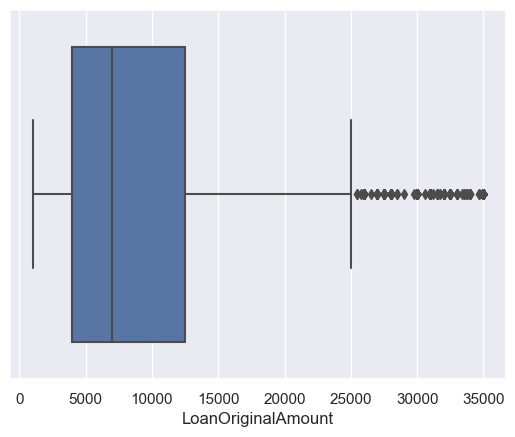

In [32]:
sb.boxplot(x = loan_amounts);

> There are 664 loan amounts that are considered outliers, with a value of 25000-35000usd. These outliers may be due to various factors such as the borrower's creditworthiness, the loan purpose, or the duration of the loan. We can investigate these outliers later in the bivariate or multivariate exploration.

### Monthly Loan Payment

#### What is the distribution of monthly loan payments and are there any outliers?

In [33]:
df2.MonthlyLoanPayment.describe()

count    96899.000000
mean       281.131021
std        193.861582
min          0.000000
25%        139.140000
50%        231.910000
75%        379.220000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [34]:
monthly_loan = df2['MonthlyLoanPayment']

# Calculate the mode for Monthly Loan Payment
payment_mode = monthly_loan.mode()[0]

# Calculate the proportion of Monthly Loan Payment, showing only top 5
proportion = monthly_loan.value_counts(normalize=True).sort_values(ascending=False)

print("The most common monthly payment amount is:", payment_mode)
print("Top 5 monthly payment amounts:")
print(proportion.head(5))

The most common monthly payment amount is: 173.71
Top 5 monthly payment amounts:
173.71    0.019907
0.00      0.007761
172.76    0.004923
86.85     0.004149
174.20    0.003643
Name: MonthlyLoanPayment, dtype: float64


> The analysis shows that the most common monthly payment amount is 173.71, with a proportion of 1.99%. It is interesting to note that some loans have a monthly payment amount of 0.00, with a proportion of 0.07% - standing the 2nd largest proportions. Further investigation may be needed to understand the reason behind this. Overall, the distribution of monthly loan payments appears to be quite varied, with a range of amounts represented in the dataset.

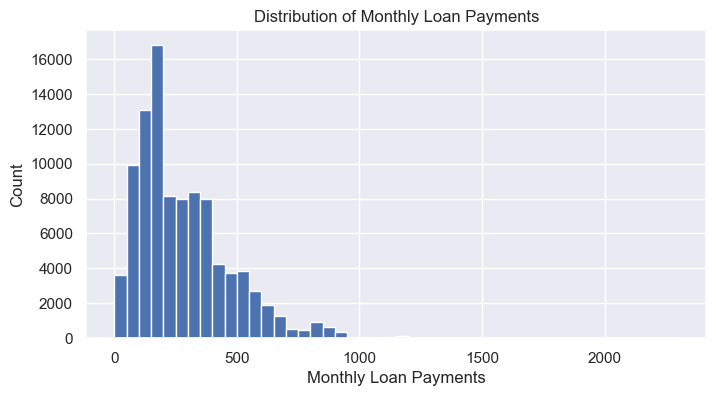

In [35]:
# Calculate the number of bins
number_of_bins = find_bins(monthly_loan)

bins = np.arange(0, monthly_loan.max()+50, 50)

# Plot the distribution of monthly loan payment
plt.hist(monthly_loan, bins = bins)
customise_chart('Monthly Loan Payments', 'Count', 'Distribution of Monthly Loan Payments', 8, 4)

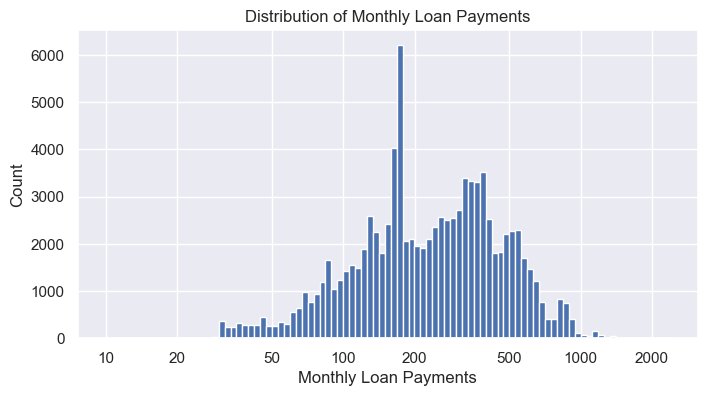

In [36]:
# Let's transform into a log scale

bins = 10 ** np.arange(1, np.log10(monthly_loan.max())+0.025, 0.025)

plt.hist(monthly_loan, bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
customise_chart('Monthly Loan Payments', 'Count', 'Distribution of Monthly Loan Payments', 8, 4)

> We can see the distribution is skewed towards the rights. The mean monthly payment is 281.13 with a standard deviation of 193.86. There is wide range in monthly loan payments from 0 - 2,251.52. With the minimum payment is 0, which may suggest some loans have no monthly payment requirement. However, we should look into these 0 monthly loan payments to see if there is any unsual later in the bivariate or multivariate exploration.

Outliers for Monthly Loan Payment:
29        1169.03
32         839.22
62         909.68
79         841.81
145        777.70
           ...   
113796     798.49
113799     890.07
113824     792.55
113830     802.89
113897     828.57
Name: MonthlyLoanPayment, Length: 2965, dtype: float64


Row indices of outliers:
Int64Index([    29,     32,     62,     79,    145,    222,    224,    245,
               314,    374,
            ...
            113523, 113544, 113623, 113691, 113752, 113796, 113799, 113824,
            113830, 113897],
           dtype='int64', length=2965)


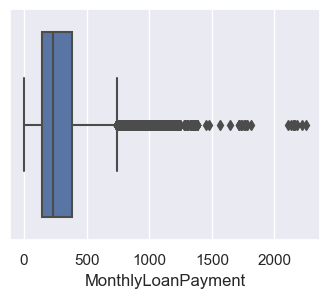

In [37]:
# calculate outliers
outliers, outliers_rows = find_outliers_iqr(monthly_loan)

print("Outliers for Monthly Loan Payment:")
print(outliers)
print("\n")
print("Row indices of outliers:")
print(outliers_rows)

# boxplot of MonthlyLoanPayment
plt.figure(figsize=(4,3))
sb.boxplot(x = monthly_loan);


> The outliers range from around 777.7 to 1169.03, which are much higher than the 75th percentile value of 379.22, indicating that these payments are significantly higher than the majority of payments. This suggests that there may be some borrowers with higher loan amounts and longer loan terms, resulting in higher monthly payments.

### Debt-to-income Ratio

#### What is the distribution of debt-to-income ratios, and are there any visible patterns or outliers?

In [38]:
dti = df2['DebtToIncomeRatio']

dti.describe()

count    96899.000000
mean         0.271925
std          0.487995
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [39]:
# Calculate the mode for Debt-to-income Ratio
dti_mode = dti.mode()[0]
dti_mode

0.18

> The DebtToIncomeRatio column has a mean of 0.271925 with a standard deviation of 0.487995. The most frequently debt-to-income-ratio is 0.18, which is not high and considered low compared to the market. 

> We also see that the max is 10.01. Came back to the variable definitions, it states "This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)." However, 1 is already 100%, so I will remove any values higher than 1.

In [40]:
# remove outliers > 1

df2 = df2[df2.DebtToIncomeRatio < 1]

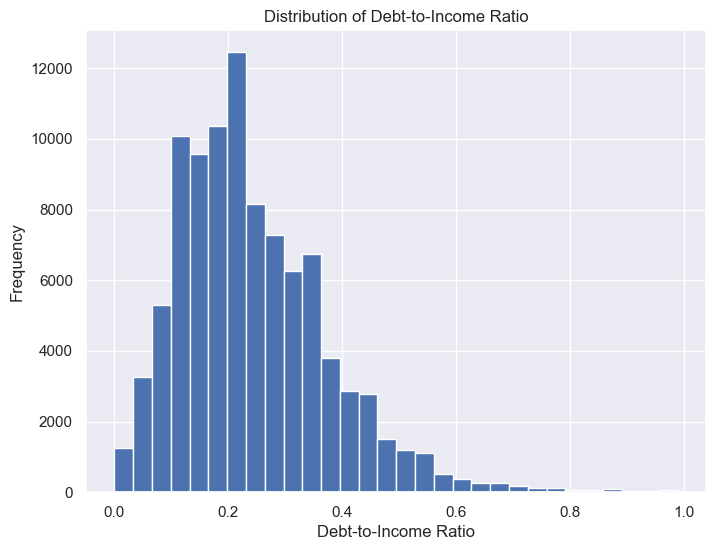

In [41]:
dti = df2['DebtToIncomeRatio']

# Plot a general histogram with 30 bins.
plt.hist(dti, bins=30)
customise_chart('Debt-to-Income Ratio', 'Frequency', 'Distribution of Debt-to-Income Ratio', 8, 6)

Now, let's run descriptive statistics and calculate the mode once again.

In [42]:
dti.describe()

count    96267.000000
mean         0.243308
std          0.133909
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max          0.990000
Name: DebtToIncomeRatio, dtype: float64

In [43]:
# Calculate the mode for Debt-to-income Ratio
dti_mode = dti.mode()[0]
dti_mode

0.18

> The minimum value is 0, and the maximum value is 0.99. The data is right-skewed, with most of the values concentrated on the lower end of the scale. The 25th percentile is 0.15, and the 75th percentile is 0.32, indicating that the majority of borrowers have a DTI ratio between 0.15 and 0.32. 

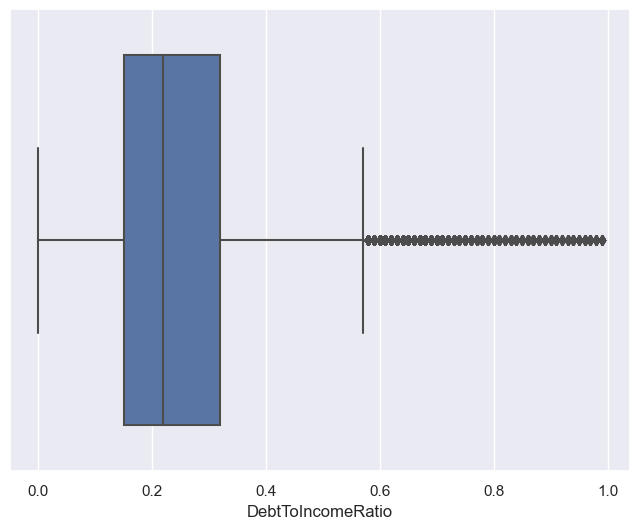

In [44]:
# boxplot of DebtToIncomeRatio
plt.figure(figsize=(8,6))
sb.boxplot(x = dti);

> It is observed that we still have outliers above 0.55 which mean DTI greater than 50%. This mean the borrower may have a significant amount of debt relative to their income. This could be due to a number of factors such as high levels of credit card debt, student loans, or a low income. However, it is also possible that errors in data entry or data processing could lead to unusually high DTI values. It may be necessary to investigate these cases further to ensure the accuracy of the data.

### Income Range, Employment Status

#### What is the distribution of borrower income ranges and employment status?

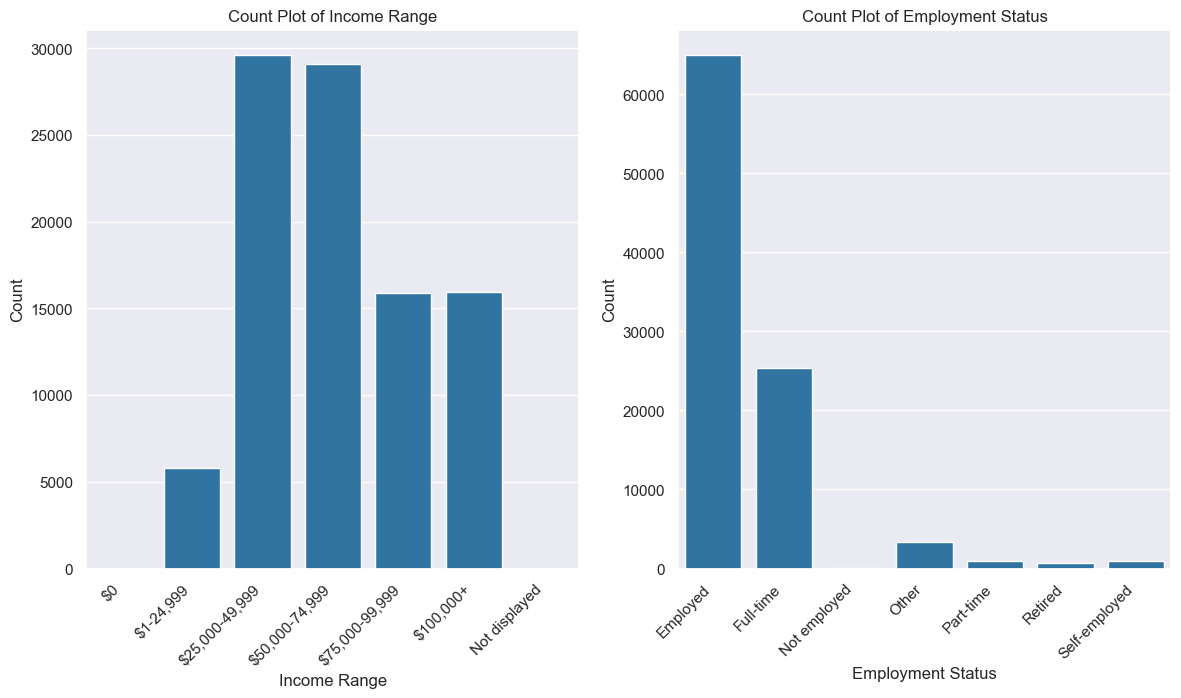

In [45]:
# Set the figure size
plt.figure(figsize=(14,7))

# Plot the count plot for income range
plt.subplot(1,2,1)
sb.countplot(data=df2, x='IncomeRange', color='#1f77b4')
plt.xticks(rotation=45, ha='right')
plt.title('Count Plot of Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')

# Plot the count plot for employment status

employment = df2['EmploymentStatus']
plt.subplot(1,2,2)
sb.countplot(data=df2, x=employment, order=employment.value_counts().index.sort_values(), color='#1f77b4')
plt.xticks(rotation=45, ha='right')
plt.title('Count Plot of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

In [46]:
df2.IncomeRange.value_counts()

$25,000-49,999    29598
$50,000-74,999    29072
$100,000+         15936
$75,000-99,999    15887
$1-24,999          5774
$0                    0
Not displayed         0
Name: IncomeRange, dtype: int64

In [47]:
df2.EmploymentStatus.value_counts()

Employed         64960
Full-time        25329
Other             3394
Self-employed      970
Part-time          890
Retired            712
Not employed        12
Name: EmploymentStatus, dtype: int64

> From the given data, we can see that the majority of borrowers fall within the income range of 25,000-74,999usd, with a total of 58,671 borrowers falling within this range. On the other hand, only a small number of borrowers have an income less than 25,000usd or are not employed. The income range of 100,000usd and above has a lower number of borrowers than the 25,000-74,999usd income range but is still higher than the 75,000-99,999usd income range. Overall, the income distribution of borrowers is slightly skewed towards the lower income range, with a majority of borrowers earning between 25,000 and 74,999usd.

> The majority of borrowers are employed, followed by full-time workers. A small number of borrowers are self-employed, part-time, retired, or not-employed.

### Credit Score Mean

#### What is the average of credit score mean? What is the distribution of credit scores?

In [48]:
df2.CreditScoreMean.describe()

count    96267.000000
mean       699.985213
std         56.777356
min        529.500000
25%        669.500000
50%        689.500000
75%        729.500000
max        889.500000
Name: CreditScoreMean, dtype: float64

> The mean value for Credit Score is 699.98, with a standard deviation of 56.77. The minimum credit score value is 529. The 25th percentile of the data is 669.5, which indicates that 25% of the borrowers have a credit score below this value. The median credit score is 689.5, which is slightly lower than the mean, indicating that the distribution may be slightly skewed to the left. The 75th percentile of the data is 729.5, indicating that 75% of the borrowers have a credit score below this value.

Let's check the outliers before we remove it.

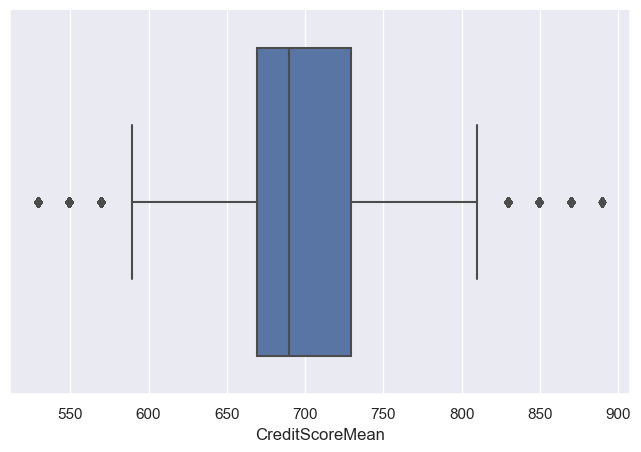

In [49]:
plt.figure(figsize=(8,5))
sb.boxplot(data = df2, x = 'CreditScoreMean');

Let's remove value > 850.

In [50]:
df2 = df2[(df2['CreditScoreMean'] <= 850)]

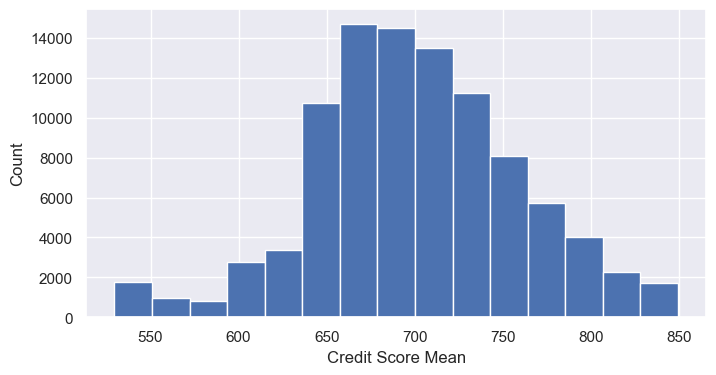

In [51]:
# Plot a countplot to visualize the distribution of credit score mean
plt.figure(figsize=(8,4))
plt.hist(data=df2, x='CreditScoreMean',bins=15)
plt.xlabel('Credit Score Mean')
plt.ylabel('Count')
plt.show()

> After remove the outliers, we can see that mostly the Credit Score Mean is in the range of 670-730 which is a quite fair, good credit score.

### Listing Category
#### How are loan purposes distributed across the dataset, and which purposes are the most common?

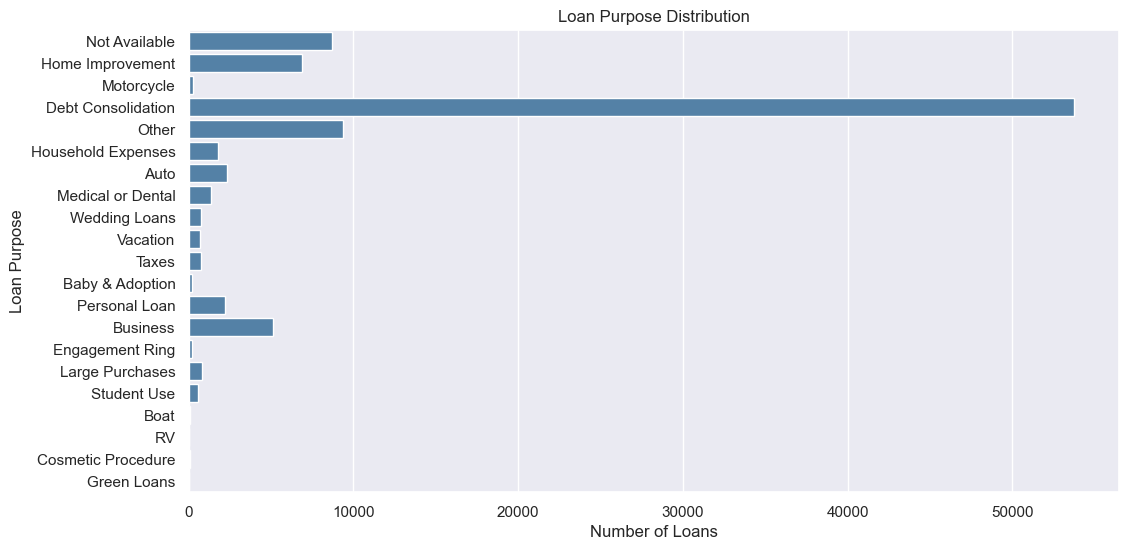

In [52]:
# Create a bar chart to show the loan purpose distribution:
plt.figure(figsize=[12,6])
sb.countplot(data = df2, y = 'ListingCategory', color='steelblue')
customise_chart('Number of Loans', 'Loan Purpose', 'Loan Purpose Distribution',12,6)

> The data suggests that the majority of borrowers have applied for loans with the purpose of debt consolidation, indicating that many individuals are seeking financial assistance to pay off their existing debts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Currently, there are no significant observations or outliers for Loan Purpose. Nonetheless, it can be inferred from the data that a large portion of borrowers have applied for loans with the purpose of debt consolidation, suggesting that many individuals are seeking financial support to pay off their current debts. However, it is crucial to perform further investigation to gain a deeper understanding of this trend.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The dataset contained several features with outliers, including LoanOriginalAmount, and MonthlyLoanPayment. However, I decided to keep these outliers in the analysis as they represent actual data points and could provide valuable insights. On the other hand, the Debt-to-Income Ratio had some values greater than 100%, which is not logical, so I decided to remove values greater than 1. Additionally, CreditScoreMean had outliers above 850, which were removed as they were likely errors. Furthermore, the Monthly Loan Payment feature had a long-tail distribution, which was transformed into a log scale to further investigate the data.

## Bivariate Exploration

After explore the variable of interest and each features individually, we will explore deeper into the relationships of features to find whether there are any correlation.

First let's recheck our dataframe.

In [53]:
df2.head()

,Term,BorrowerAPR,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio,IncomeRange,EmploymentStatus,ListingCategory,CreditScoreMean
0,36,0.16516,0.1580,9425,330.43,0.17,"$25,000-49,999",Self-employed,Not Available,649.5
1,36,0.12016,0.0920,10000,318.93,0.18,"$50,000-74,999",Employed,Home Improvement,689.5
3,36,0.12528,0.0974,10000,321.45,0.15,"$25,000-49,999",Employed,Motorcycle,809.5
4,36,0.24614,0.2085,15000,563.97,0.26,"$100,000+",Employed,Home Improvement,689.5
5,60,0.15425,0.1314,15000,342.37,0.36,"$100,000+",Employed,Debt Consolidation,749.5


### Correlation between numerical variables

Now let's create pair plot to explore the correlation

In [54]:
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 
                'MonthlyLoanPayment', 'DebtToIncomeRatio', 'CreditScoreMean']
categoric_vars = ['IncomeRange', 'EmploymentStatus', 'ListingCategory']

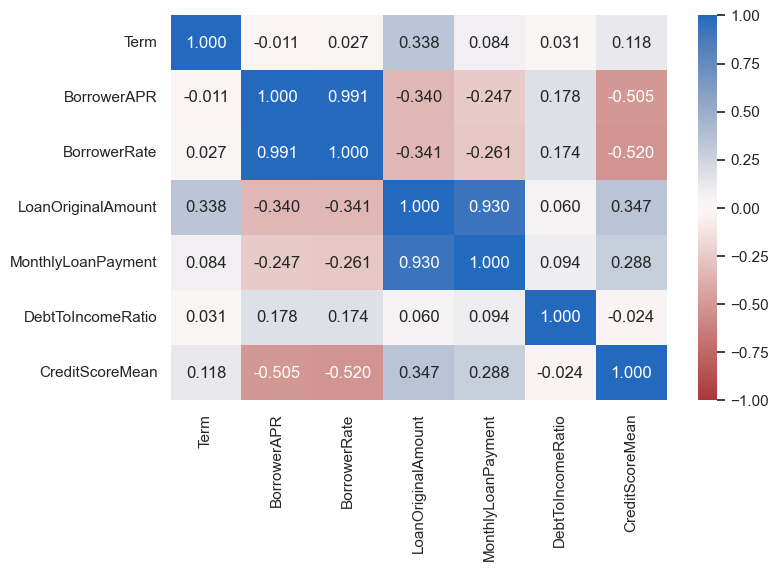

In [55]:
# correlation plot with heatmap
plt.figure(figsize = [8, 5])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r',
           center = 0, vmin=-1, vmax=1)
plt.show()

> It is not surprising to see that BorrowerAPR, BorrowerRate, LoanOriginalAmount, and MonthlyLoanPayment have the strongest positive correlations, almost reaching 1. However, it is interesting to note that these pairs of variables exhibit moderate negative correlations with each other. This indicates that higher LoanOriginalAmount and MonthlyLoanPayment are associated with lower BorrowerAPR and BorrowerRate. Additionally, LoanOriginalAmount has the highest negative correlation with BorrowerRate, suggesting that the loan amount and Rate are inversely related.

> The feature CreditScoreMean exhibits a strong negative correlation with BorrowerRate and BorrowerAPR, indicating that higher credit scores correspond to lower interest rates and annual percentage rates. On the other hand, LoanOriginalAmount and MonthlyLoanPayment have moderately positive correlations with CreditScoreMean, indicating that higher credit scores are associated with higher loan amounts and monthly payments. These findings suggest that credit score is an important factor in determining loan terms, and could potentially be used by lenders to manage risk and make informed lending decisions.

> There is a moderate positive correlation between the Term and LoanOriginalAmount variables. This suggests that borrowers tend to opt for longer loan terms when borrowing higher amounts, which is a logical trend.

> Interestingly, DebtToIncomeRatio exhibits the least correlation with the other numeric variables in the dataset. It is noteworthy that there is a lack of negative correlation between DebtToIncomeRatio and other features; all correlations are positive.

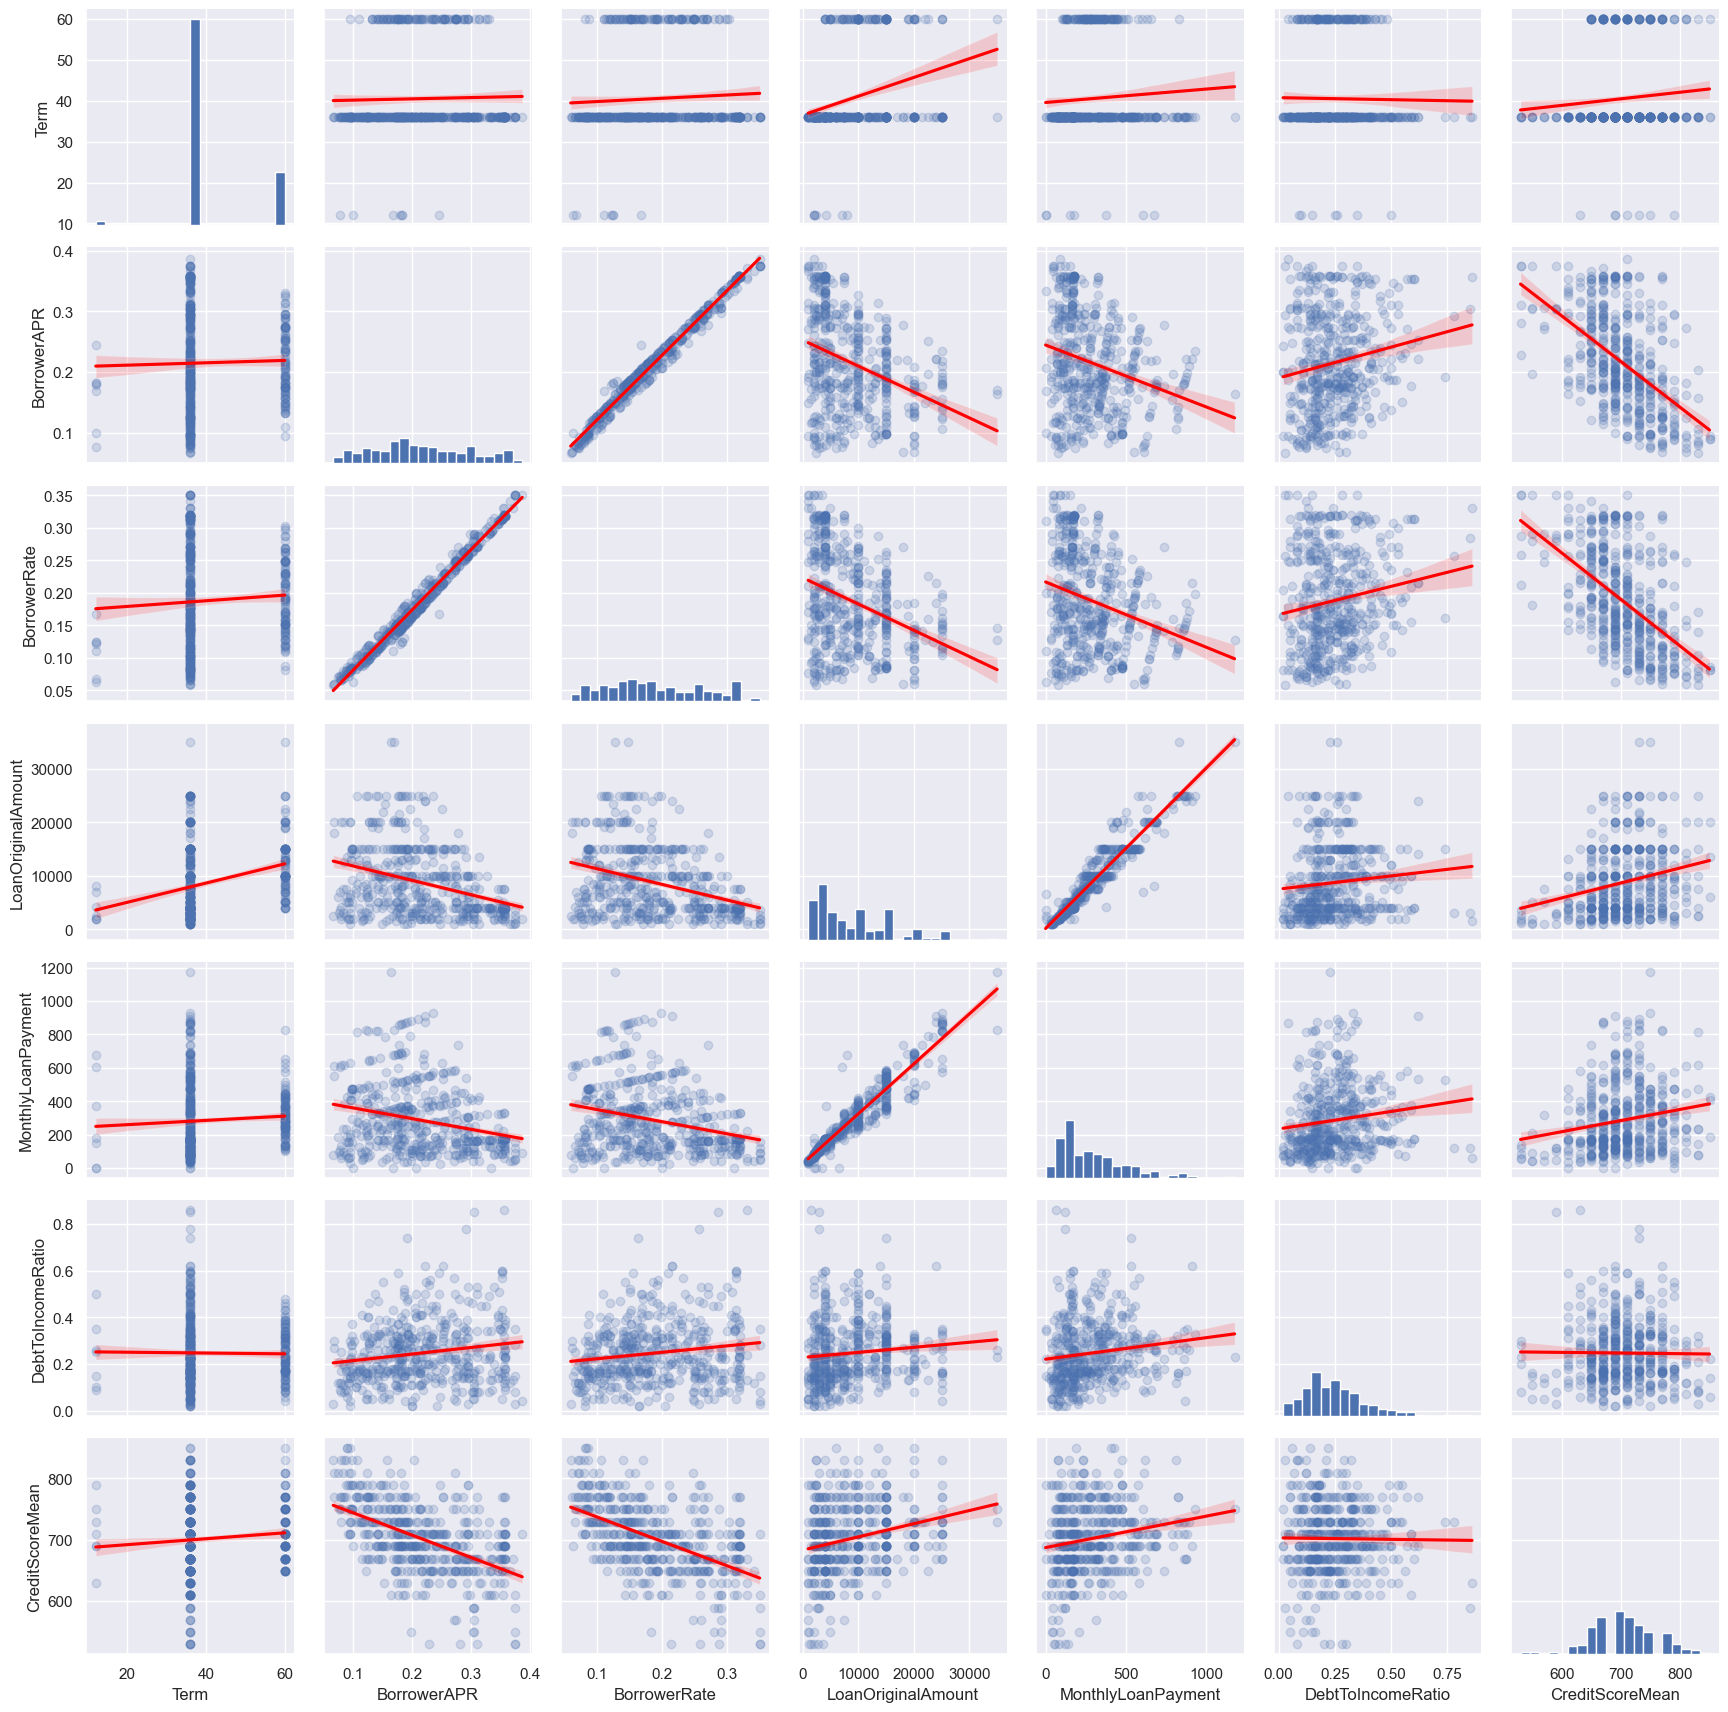

In [56]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
sample_data = df2.sample(n=500, replace = False)
g = sb.PairGrid(data = sample_data, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sb.regplot, scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})

> Based on the analysis, there are several variables that may warrant further investigation.
> * First, the relationship between credit score and loan terms (LoanOriginalAmount, MonthlyLoanPayment) could be explored in more detail, as higher credit scores are associated with both higher loan amounts and lower interest rates.
> * Second, the negative correlation between LoanOriginalAmount and BorrowerAPR suggests that the loan amount and APR are inversely related, which could be further explored to better understand the relationship between loan amount and interest rates.
> * Third, the lack of correlation between DebtToIncomeRatio and other variables suggests that this feature may not be as important in determining loan terms as credit score or loan amount. However, because the main variables of interest is to motivations of borrowers when applying for loans, we still need to further explore the relationship of DebtToIncomeRatio with categorical variables.
> * Finally, Term variables seems to not have any correlation with other numerical variables, one of the reasons is may be it should be treated as categorical variables. Therefore, we will investigate this features again in the categorical correlations.

### Correlations between categorical variables

Let's move one to looking on how these numerical varibles correlate with the categorical variables.

C:\Users\Natalie\AppData\Local\Temp\ipykernel_20228\1968309775.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


<Figure size 2000x1500 with 0 Axes>

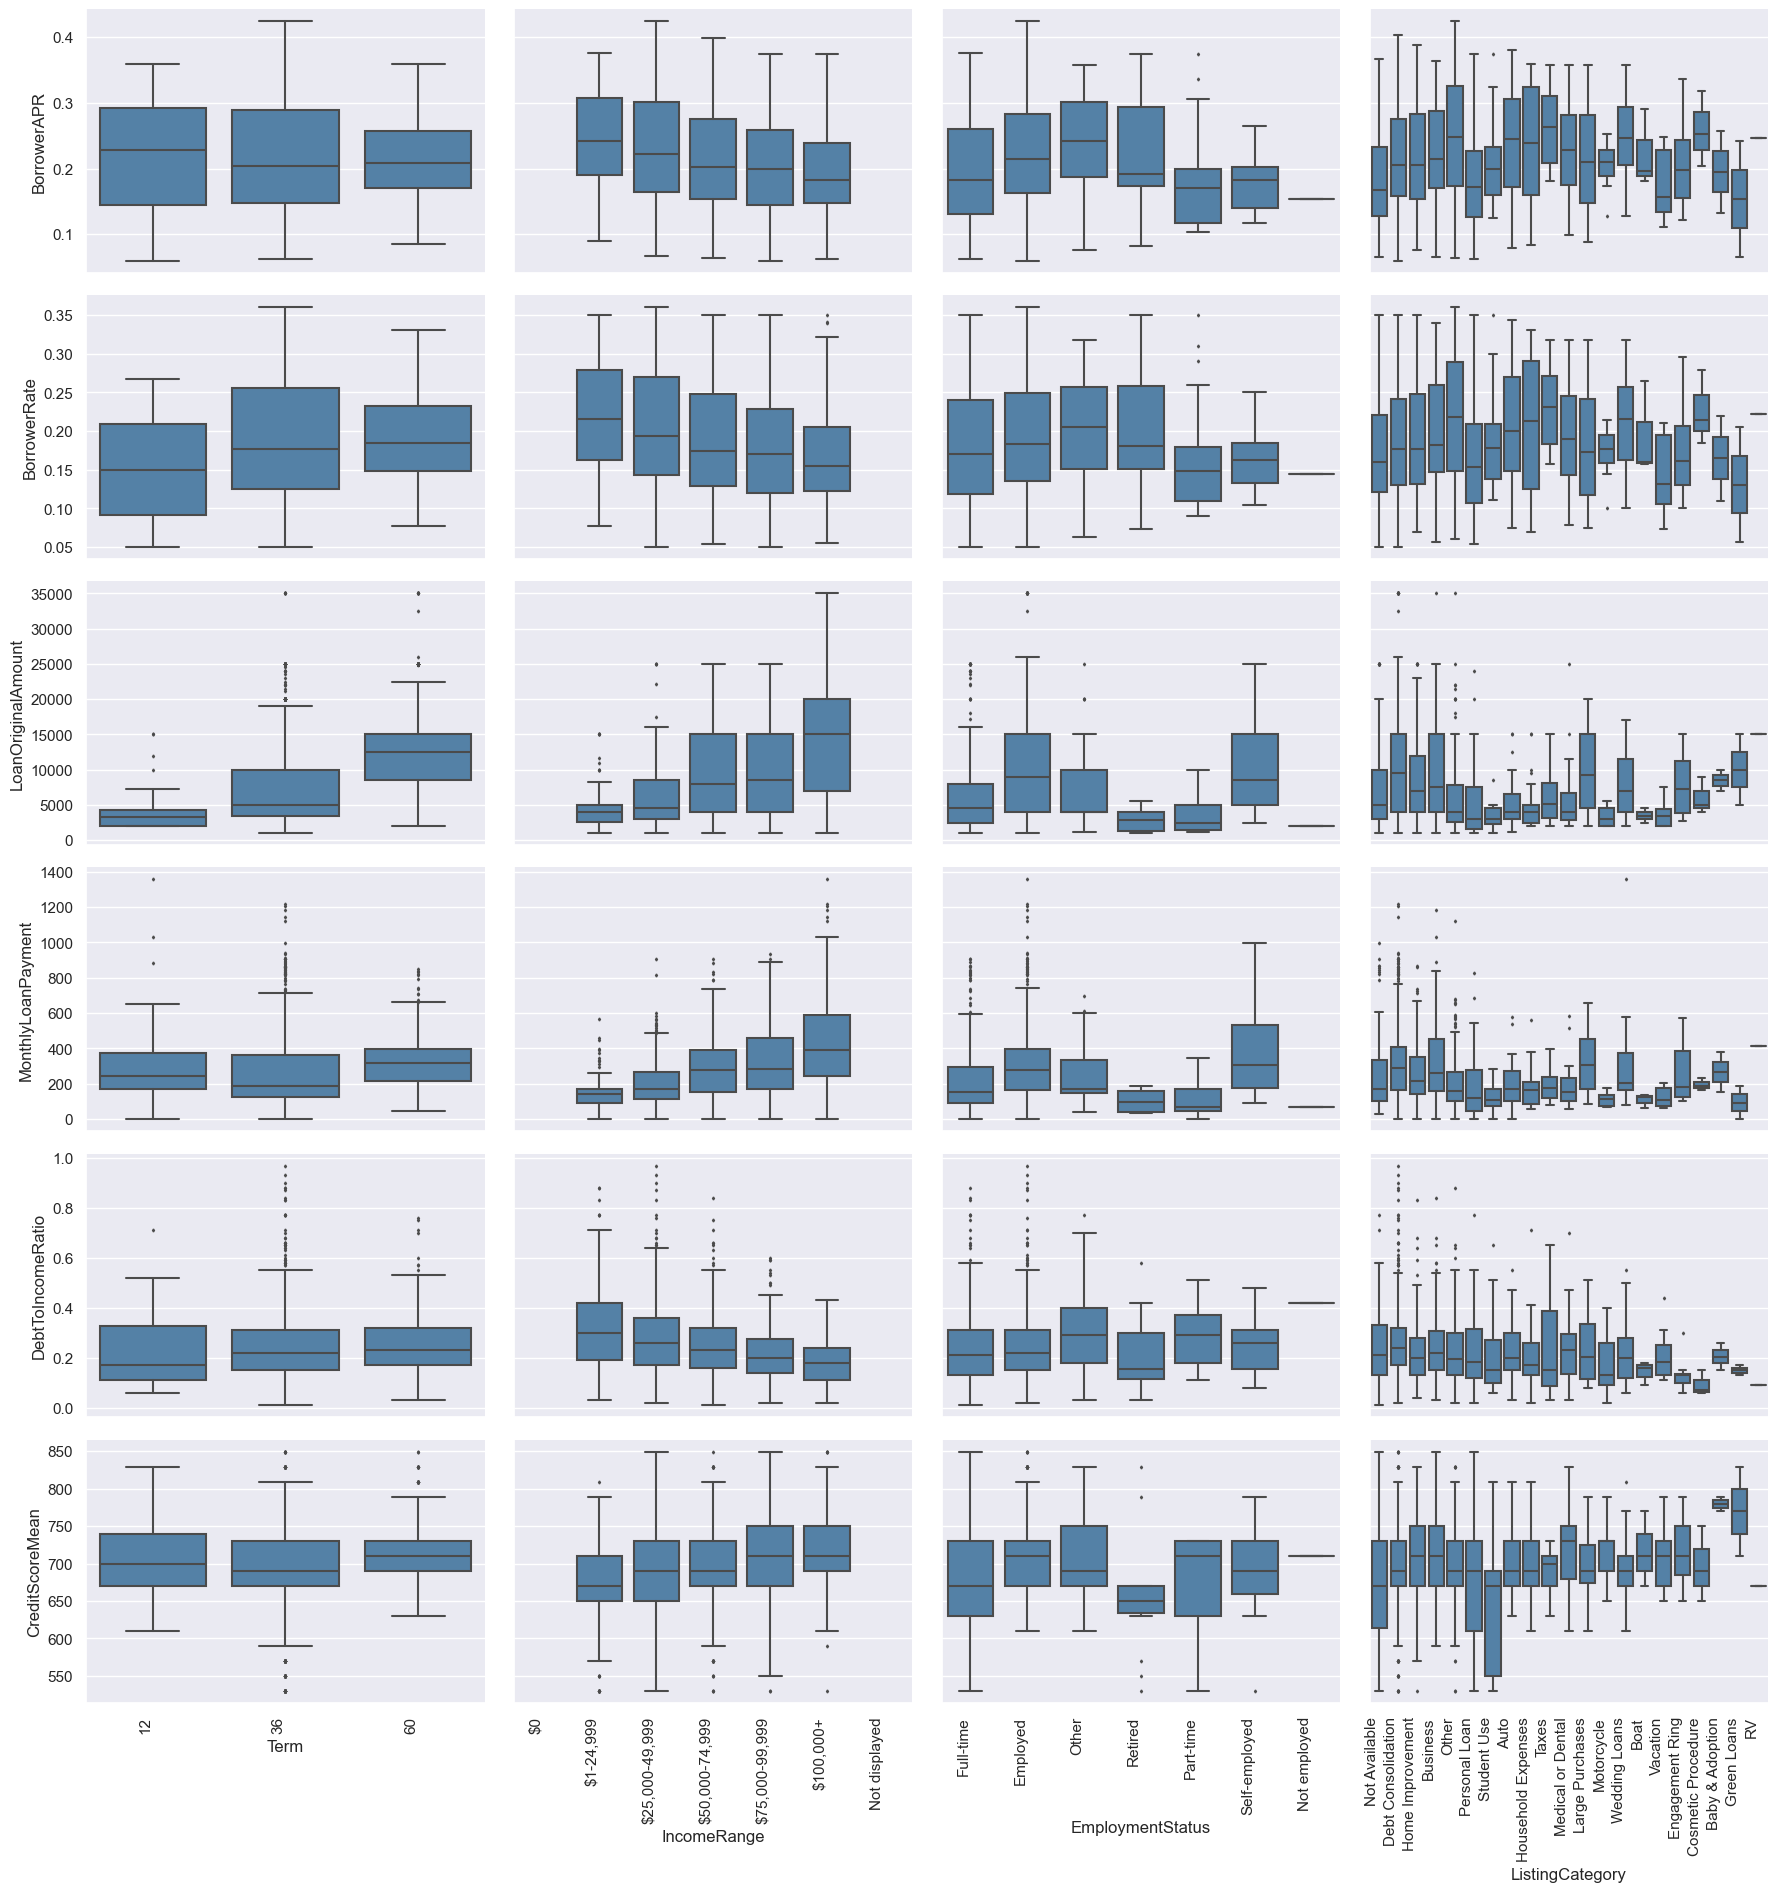

In [57]:
# update our variables list
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 
                'MonthlyLoanPayment', 'DebtToIncomeRatio', 'CreditScoreMean']
categoric_vars = ['Term', 'IncomeRange', 'EmploymentStatus', 'ListingCategory']

# create sample data
sample_data = df2.sample(n=2000, replace = False)

# Create function to plot boxgrid
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

# create pairgrid
plt.figure(figsize = [20, 15])
g = sb.PairGrid(data = sample_data, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)

# iterate over each subplot in the grid and set the xticklabels rotation
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# map boxgrid
g.map(sb.boxplot, color='steelblue', fliersize=1.5)
plt.show();

>* Treating Term as a categorical variable allows for a deeper understanding of its correlations with other features. The relationship between DebtToIncomeRatio and Term may provide insight into borrower behavior when obtaining loans. Longer loan terms appear to encourage borrowers to increase their debt ratio, presumably to take advantage of extended payback periods. Furthermore, as expected, borrowers with larger LoanOriginalAmounts tend to prefer longer loan terms.

>* It is unsurprising that borrowers with higher IncomeRanges were able to obtain larger LoanOriginalAmounts at lower BorrowerRates, while still being able to manage their DebtToIncomeRatios. Additionally, borrowers with EmploymentStatus as employed, full-time, or self-employed tended to have lower ranges of DebtToIncomeRatio, while retired borrowers had the widest range. However, having a high IncomeRange does not necessarily mean that a borrower can manage their DebtToIncomeRatio effectively.
>* It is not clear to see the correlation of ListingCategory with other features so we will investigate further on this, as this is the loan purpose.

#### Are there any trends in loan purposes with respect to borrower profiles (income range, credit score)?

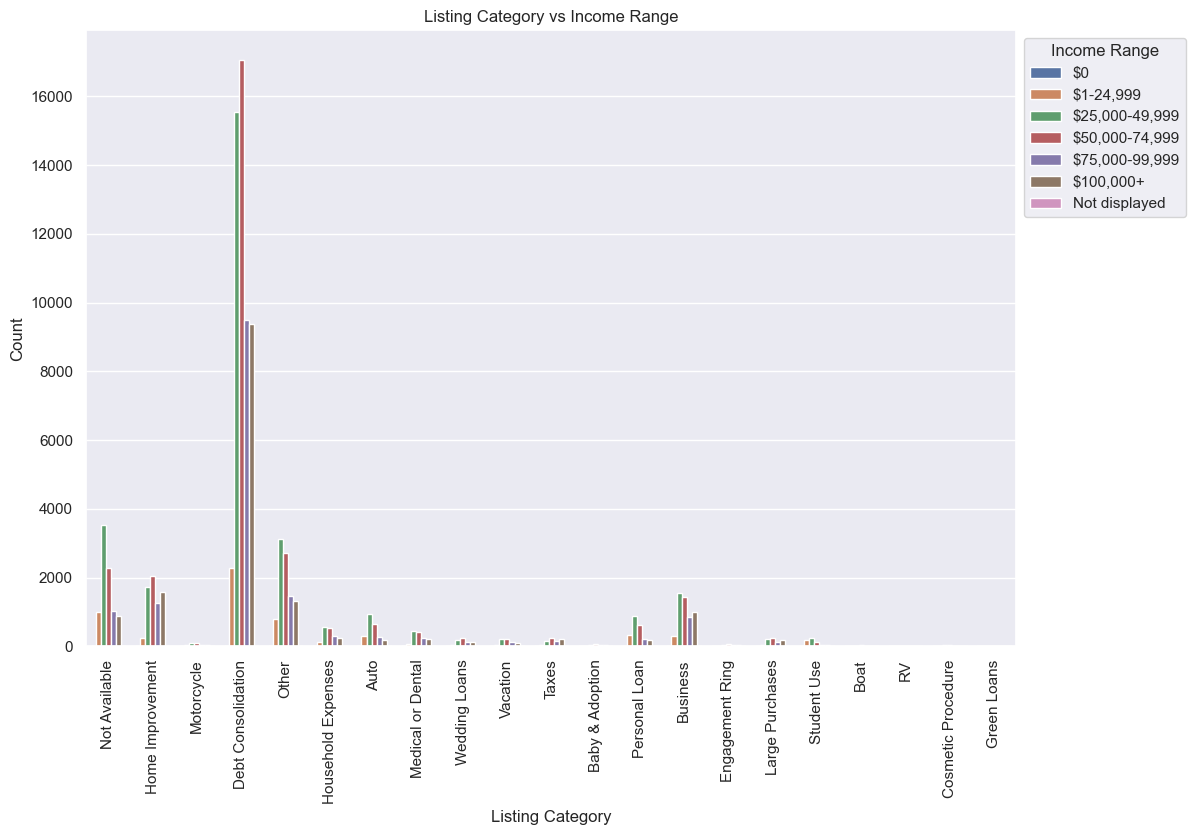

In [58]:
# ListingCategory vs IncomeRange
plt.figure(figsize=(12, 8))
sb.countplot(data=df2, x='ListingCategory', hue='IncomeRange')
plt.xticks(rotation=90)
plt.legend(title='Income Range', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Listing Category vs Income Range')
plt.xlabel('Listing Category')
plt.ylabel('Count')
plt.show()

It can be observed that in most cases, borrowers seeking loans for various purposes fall within the income range of 25k-75k, particularly for the purpose of Debt Consolidation. This suggests that while borrowers do have some source of income, it may not be sufficient to meet their financial needs.

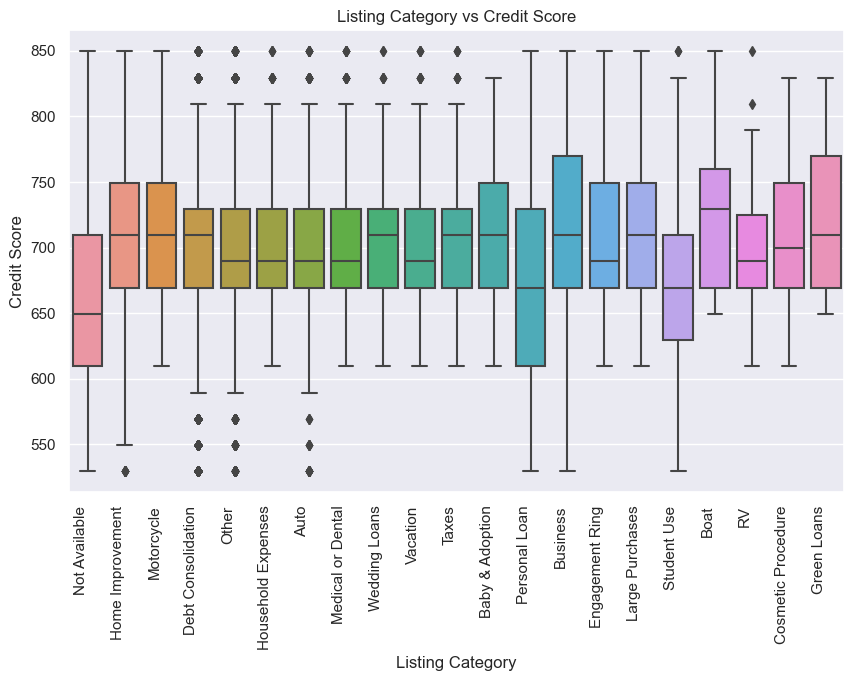

In [59]:
# ListingCategory vs CreditScoreMean
plt.figure(figsize=(10, 6))
sb.boxplot(data=df2, x='ListingCategory', y='CreditScoreMean')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Listing Category')
plt.ylabel('Credit Score')
plt.title('Listing Category vs Credit Score')
plt.show()

It appears that borrower's credit scores are consistent across different loan purposes. On average, credit scores range from 670 to 730 regardless of the loan purpose.

> Based on the analysis, we can conclude that credit score is a significant factor in determining loan terms, with higher scores leading to lower interest rates and higher loan amounts. Additionally, loan amount and monthly payments exhibit a moderate negative correlation with BorrowerAPR and BorrowerRate, suggesting that higher loan amounts and payments are associated with lower APR and interest rates. The positive correlation between Term and LoanOriginalAmount further supports the trend of borrowers opting for longer loan terms when borrowing higher amounts. Although DebtToIncomeRatio does not exhibit strong correlations with other variables, it is still an important factor in determining a borrower's ability to repay the loan. 

## Multivariate Exploration

#### Are there any patterns in the distribution of debt-to-income ratios across loan purposes and borrower profiles (employment status, income range)?

Text(0.5, 1.0, 'Distribution of Debt-to-Income Ratio across Loan Purposes and Employment Status')

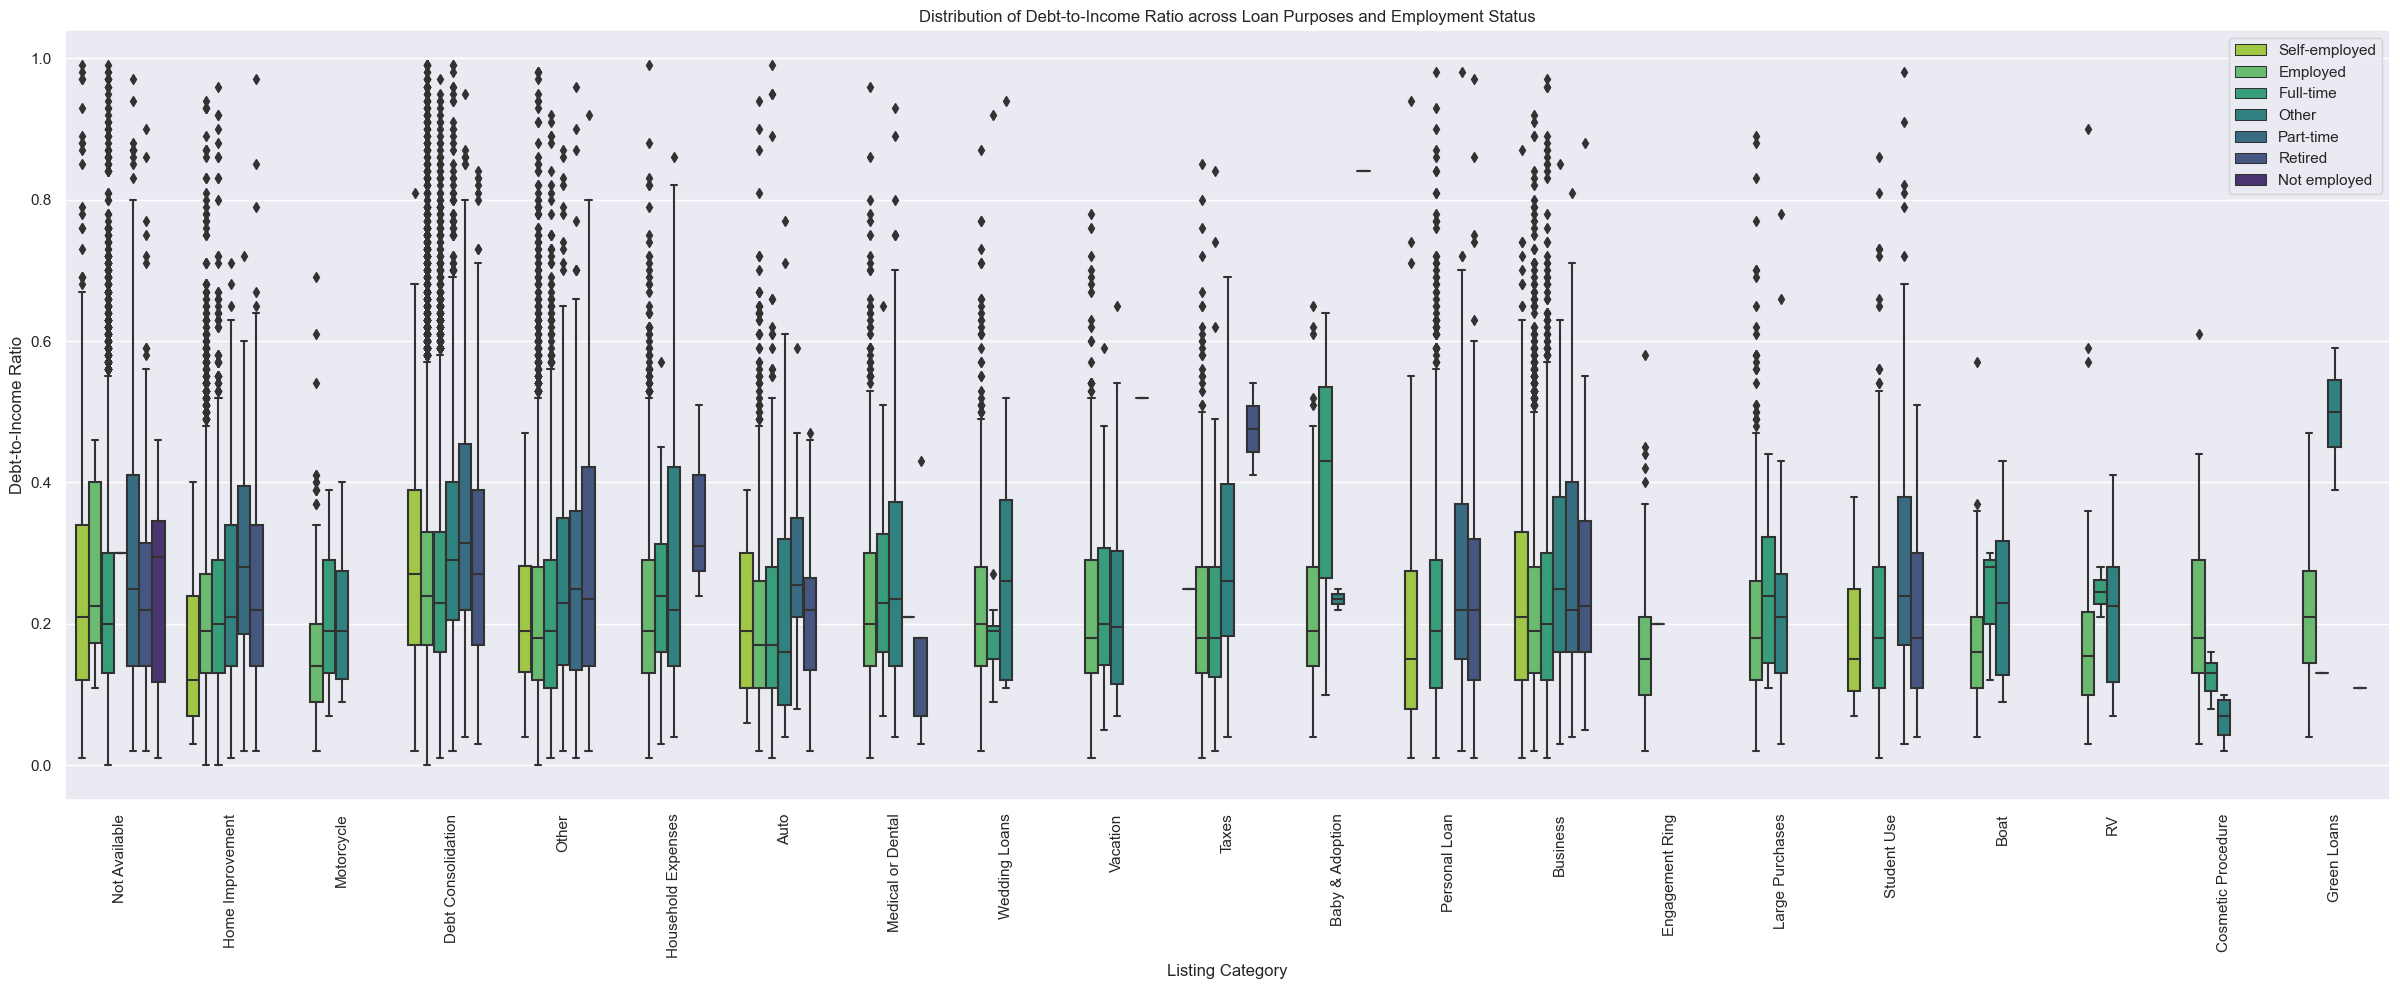

In [60]:
plt.figure(figsize=(30, 10))
sb.boxplot(data=df2, x='ListingCategory', y='DebtToIncomeRatio', hue='EmploymentStatus', palette='viridis_r')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Listing Category')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Distribution of Debt-to-Income Ratio across Loan Purposes and Employment Status')


It is apparent that borrowers with loan purposes such as debt consolidation, home improvement, household expense, medical, or dental generally have a lower debt-to-income ratio, with values lower than 0.5. Conversely, borrowers with loan purpose of baby and adoption tend to have higher DTI. Moreover, it is expected that those with part-time, retired, and not-employed employment status have higher DTI.

#### How do BorrowerAPR and LoanOriginalAmount interact with IncomeRange?

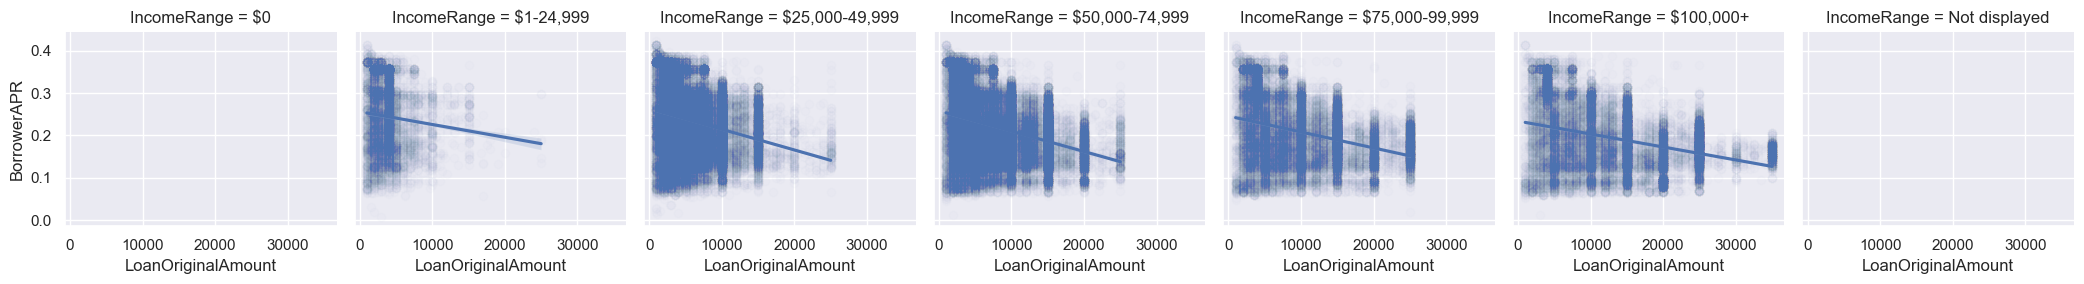

In [61]:
g = sb.FacetGrid(data=df2, col='IncomeRange')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'alpha': 0.01});

As expected, borrowers with higher income ranges tend to obtain larger loans at lower APRs compared to those with lower income ranges. However, it appears that this trend gradually diminishes as the income range increases.

## Conclusions

After exploring the motivations of borrowers when applying for loans and identifying the factors that impact their decision-making process when selecting a loan, several interesting findings have emerged. 

1. BorrowerAPR, BorrowerRate, LoanOriginalAmount, and MonthlyLoanPayment exhibit strong positive correlations, almost reaching 1, but moderate negative correlations with each other. This indicates that higher loan amounts and monthly payments are associated with lower borrower APR and rate. Credit score is also an important factor in determining loan terms, with higher scores leading to lower interest rates and higher loan amounts. The positive correlation between term and loan original amount further supports the trend of borrowers opting for longer loan terms when borrowing higher amounts. Although DebtToIncomeRatio does not exhibit strong correlations with other variables, it is still an important factor in determining a borrower's ability to repay the loan.

2. The lack of negative correlation between DebtToIncomeRatio and other features suggests that this feature may not be as important in determining loan terms as credit score or loan amount. However, it is important to further explore the relationship of DebtToIncomeRatio with categorical variables to fully understand its impact on borrower behavior. Additionally, the relationship between credit score and loan terms could be explored in more detail, as higher credit scores are associated with both higher loan amounts and lower interest rates. The negative correlation between LoanOriginalAmount and BorrowerAPR also suggests that the loan amount and APR are inversely related, which could be further explored to better understand the relationship between loan amount and interest rates.

3. It is apparent that borrowers with higher income ranges tend to obtain larger loans at lower APRs compared to those with lower income ranges. However, this trend gradually diminishes as the income range increases. It is also noteworthy that borrowers seeking loans for various purposes fall within the income range of 25k-75k, particularly for the purpose of Debt Consolidation. This suggests that while borrowers do have some source of income, it may not be sufficient to meet their financial needs. Moreover, borrowers with loan purposes such as debt consolidation, home improvement, household expense, medical, or dental generally have a lower debt-to-income ratio, with values lower than 0.5, while borrowers with loan purpose of baby and adoption tend to have higher DTI. These findings provide important insights into borrower behavior and can be used to inform lending decisions.

It is important to note some limitations of this analysis. The dataset only includes information on loans originated through a single lending platform and may not be representative of the entire lending market. Additionally, the analysis is limited to the variables included in the dataset and does not take into account other factors that may impact borrower behavior, such as economic conditions and borrower characteristics. Future research could explore these factors in more detail to gain a more comprehensive understanding of borrower motivations and decision-making processes.